In [1]:
from train_gp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [2]:
small_dataset_path = 'data\DGA TC10.xlsx'

343


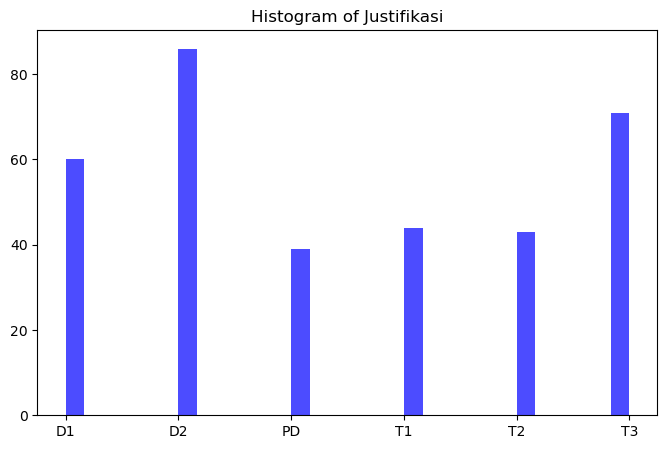

In [3]:
# Read the test data
small_dataset = pd.read_excel(small_dataset_path, sheet_name='Sheet1')
small_dataset = transform_small_dataset(small_dataset)
print(len(small_dataset))

# Plot histogram of Justifikasi column
plt.figure(figsize=(8, 5))
plt.hist(small_dataset['Justifikasi'].astype(str), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Justifikasi')
plt.show()

# Gaussian Process Classificiation

## D1 vs R

In [4]:
D1VsR_data_generator = OneVsRestDataExtraction(small_dataset,"D1",random_state=100)
D1VsR_reports_name = ["D1vsR_10_5","D1vsR_15_5","D1vsR_20_10","D1vsR_25_10","D1vsR_30_15","D1vsR_35_15"]

In [5]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
D1vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=20, max_iter_predict=400, random_state=3)

In [6]:
D1vsR_reports = train_onevsrest_gpc_with_data_variation(D1vsR_gpc,
                                        D1VsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        D1VsR_reports_name)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn

In [7]:
print_report(D1VsR_reports_name, D1vsR_reports)

Classifier: D1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 251
  Incorrect predictions on sampled test data : 57
  Percentage of correct prediction : 81.4935064935065 %

Classifier: D1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 258
  Incorrect predictions on sampled test data : 45
  Percentage of correct prediction : 85.14851485148515 %

Classifier: D1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 252
  Incorrect

## D2 vs R

In [8]:
D2VsR_data_generator = OneVsRestDataExtraction(small_dataset,"D2",random_state=100)
D2VsR_reports_name = ["D2vsR_10_5","D2vsR_15_5","D2vsR_20_10","D2vsR_25_10","D2vsR_30_15","D2vsR_35_15"]

In [9]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
D2vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=10)

In [10]:
D2vsR_reports = train_onevsrest_gpc_with_data_variation(D2vsR_gpc,
                                        D2VsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        D2VsR_reports_name)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [11]:
print_report(D2VsR_reports_name, D2vsR_reports)

Classifier: D2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 253
  Incorrect predictions on sampled test data : 55
  Percentage of correct prediction : 82.14285714285714 %

Classifier: D2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 231
  Incorrect predictions on sampled test data : 72
  Percentage of correct prediction : 76.23762376237624 %

Classifier: D2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 209
  Incorrec

## PD vs R

In [12]:
PDVsR_data_generator = OneVsRestDataExtraction(small_dataset,"PD",random_state=90)
PDVsR_reports_name = ["PDvsR_10_5","PDvsR_15_5","PDvsR_20_10","PDvsR_25_10","PDvsR_30_15","PDvsR_35_15"]

In [13]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
PDvsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=400, random_state=11)

In [14]:
PDvsR_reports = train_onevsrest_gpc_with_data_variation(PDvsR_gpc,
                                        PDVsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        PDVsR_reports_name)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res

In [15]:
print_report(PDVsR_reports_name, PDvsR_reports)

Classifier: PDvsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 279
  Incorrect predictions on sampled test data : 29
  Percentage of correct prediction : 90.5844155844156 %

Classifier: PDvsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 287
  Incorrect predictions on sampled test data : 16
  Percentage of correct prediction : 94.71947194719472 %

Classifier: PDvsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 264
  Incorrect

## T1 vs R

In [16]:
T1VsR_data_generator = OneVsRestDataExtraction(small_dataset,"T1",random_state=95)
T1VsR_reports_name = ["T1vsR_10_5","T1vsR_15_5","T1vsR_20_10","T1vsR_25_10","T1vsR_30_15","T1vsR_35_15"]

In [17]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T1vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=29)

In [18]:
T1vsR_reports = train_onevsrest_gpc_with_data_variation(T1vsR_gpc,
                                        T1VsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T1VsR_reports_name)

In [19]:
print_report(T1VsR_reports_name, T1vsR_reports)

Classifier: T1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 266
  Incorrect predictions on sampled test data : 42
  Percentage of correct prediction : 86.36363636363636 %

Classifier: T1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 258
  Incorrect predictions on sampled test data : 45
  Percentage of correct prediction : 85.14851485148515 %

Classifier: T1vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 240
  Incorrec

## T2 vs R

In [20]:
T2VsR_data_generator = OneVsRestDataExtraction(small_dataset,"T2",random_state=95)
T2VsR_reports_name = ["T2vsR_10_5","T2vsR_15_5","T2vsR_20_10","T2vsR_25_10","T2vsR_30_15","T2vsR_35_15"]

In [21]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T2vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=39)

In [22]:
T2vsR_reports = train_onevsrest_gpc_with_data_variation(T2vsR_gpc,
                                        T2VsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T2VsR_reports_name)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [23]:
print_report(T2VsR_reports_name, T2vsR_reports)

Classifier: T2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 252
  Incorrect predictions on sampled test data : 56
  Percentage of correct prediction : 81.81818181818183 %

Classifier: T2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 251
  Incorrect predictions on sampled test data : 52
  Percentage of correct prediction : 82.83828382838284 %

Classifier: T2vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 241
  Incorrec

## T3 vs R

In [24]:
T3VsR_data_generator = OneVsRestDataExtraction(small_dataset,"T3",random_state=47)
T3VsR_reports_name = ["T3vsR_10_5","T3vsR_15_5","T3vsR_20_10","T3vsR_25_10","T3vsR_30_15","T3vsR_35_15"]

In [25]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T3vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=73)

In [26]:
T3vsR_reports = train_onevsrest_gpc_with_data_variation(T3vsR_gpc,
                                        T3VsR_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T3VsR_reports_name)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\

In [27]:
print_report(T3VsR_reports_name, T3vsR_reports)

Classifier: T3vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 281
  Incorrect predictions on sampled test data : 27
  Percentage of correct prediction : 91.23376623376623 %

Classifier: T3vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 279
  Incorrect predictions on sampled test data : 24
  Percentage of correct prediction : 92.07920792079209 %

Classifier: T3vsR
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 251
  Incorrec

## Test all One vs Rest classifier

In [28]:
D1vsR_models_name =  ["D1vsR_10_5","D1vsR_20_10","D1vsR_30_15"]
D1vsR_trained_model = train_onevsrest_gpc_with_data_variation(D1vsR_gpc,
                                        D1VsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        D1vsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [29]:
D2vsR_models_name =  ["D2vsR_10_5","D2vsR_20_10","D2vsR_30_15"]
D2vsR_trained_model = train_onevsrest_gpc_with_data_variation(D2vsR_gpc,
                                        D2VsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        D2vsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [30]:
PDvsR_models_name =  ["PDvsR_10_5","PDvsR_20_10","PDvsR_30_15"]
PDvsR_trained_model = train_onevsrest_gpc_with_data_variation(PDvsR_gpc,
                                        PDVsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        PDvsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [31]:
T1vsR_models_name =  ["T1vsR_10_5","T1vsR_20_10","T1vsR_30_15"]
T1vsR_trained_model = train_onevsrest_gpc_with_data_variation(T1vsR_gpc,
                                        T1VsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T1vsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [32]:
T2vsR_models_name =  ["T2vsR_10_5","T2vsR_20_10","T2vsR_30_15"]
T2vsR_trained_model = train_onevsrest_gpc_with_data_variation(T2vsR_gpc,
                                        T2VsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T2vsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [33]:
T3vsR_models_name =  ["T3vsR_10_5","T3vsR_20_10","T3vsR_30_15"]
T3vsR_trained_model = train_onevsrest_gpc_with_data_variation(T3vsR_gpc,
                                        T3VsR_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T3vsR_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

In [34]:
X_test = small_dataset.drop(columns="Justifikasi").to_numpy()
y_test = small_dataset["Justifikasi"].map(encode_justifikasi).to_numpy()

In [40]:
all_classifiers = {
    "D1": D1vsR_trained_model['D1vsR_10_5'].gpc_model, 
    "D2": D2vsR_trained_model['D2vsR_10_5'].gpc_model, 
    "PD": PDvsR_trained_model['PDvsR_10_5'].gpc_model, 
    "T1": T1vsR_trained_model['T1vsR_10_5'].gpc_model, 
    "T2": T2vsR_trained_model['T2vsR_10_5'].gpc_model, 
    "T3": T3vsR_trained_model['T3vsR_10_5'].gpc_model
    }

# Precompute probabilities for all classifiers (shape: n_class, n_samples)
proba_matrix = np.vstack([
    clf.predict_proba(X_test)[:, -1] for clf in all_classifiers.values() # type: ignore
])

# Get predicted class indices by taking argmax along the classifier axis
prediction_indices = np.argmax(proba_matrix, axis=0)

# Map indices back to class names and then encode
class_names = list(all_classifiers.keys())
prediction_labels = [class_names[idx] for idx in prediction_indices]
prediction = np.array(list(map(encode_justifikasi, prediction_labels)))



In [41]:
number_of_correct_predictions = np.sum(prediction == y_test)
percentage_of_correct_predictions = number_of_correct_predictions/len(y_test)*100
print("Number of correct prediction =",number_of_correct_predictions)
print("Percentage of correct prediction =", percentage_of_correct_predictions)

Number of correct prediction = 205
Percentage of correct prediction = 59.7667638483965
